Bibliotecas a serem usadas.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

Conjunto de dados extraídos do Jira.
 - Essa analise foi feita para identificar a quantidade de solicitações abertas no primeiro semestre de 2022 e criar planos de melhoria.

In [4]:
jira = "https://raw.githubusercontent.com/tjalmeida369/analise_jira_chamados_cdc/main/CHAMADOS%20PLANEJAMENTO%20-%20N1-Total.csv?token=GHSAT0AAAAAABX5OS5ZAWWGFGS2IDX4LKKEYYM6RRQ"
chamados = pd.read_csv(jira)
chamados.head(10)


,Chave,Resumo,Responsável,Relator,Status,Criado,Resolvido,Tipo de chamado,Mês Criação,Macro Chamado
0,CDC-8798,Notebook não conecta na internet,THIAGO JUNIO DE ALMEIDA,GIZELLE LIMA DIAS PRECIOSO,Em Atendimento,6/7/2022 12:42:31,NaN,Hardware - Ponto de Rede,06/2022,Sistema
1,CDC-8796,Destravar fluxo,THIAGO JUNIO DE ALMEIDA,FERNANDA HERCULANO DOS SANTOS,Finalizado,6/6/2022 21:15:59,6/7/2022 12:14:26,Sistema Interno - Falha na Webservice de Cance...,06/2022,Software
2,CDC-8795,Alterar Desk para Note - ANA PAULA SOARES OTON...,THIAGO JUNIO DE ALMEIDA,VANIA LIYE DE OLIVEIRA COSTA,Em Atendimento,6/6/2022 18:20:08,NaN,Hardware - Monitor,06/2022,Sistema
3,CDC-8794,Pedido Guldi de 2020,THIAGO JUNIO DE ALMEIDA,MIRIAN DE ANDRADE SILVA,Finalizado,6/6/2022 18:10:21,6/7/2022 12:23:10,Sistema Interno - Pedido não Integrado,06/2022,Software
4,CDC-8791,Destravar fluxo,THIAGO JUNIO DE ALMEIDA,FERNANDA HERCULANO DOS SANTOS,Finalizado,6/6/2022 14:46:53,6/6/2022 15:47:45,Sistema Interno - Problemas no Envio de Email/...,06/2022,Sistema
5,CDC-8790,Verificar cupom de desconto RA,THIAGO JUNIO DE ALMEIDA,BARBARA BYANCA ROSA LEMOS,Rejeitado,6/6/2022 13:41:01,NaN,Sistema Interno - Divergência Entre Sistemas,06/2022,Software
6,CDC-8789,Erro ao adicionar item no carrinho - Guarda ro...,THIAGO JUNIO DE ALMEIDA,GISELE CUSTODIO DE CARVALHO,Finalizado,6/6/2022 12:56:23,6/6/2022 13:52:59,Site - Carrinho Vazio,06/2022,Sistema
7,CDC-8788,Erro no produto Bundle,THIAGO JUNIO DE ALMEIDA,BARBARA BYANCA ROSA LEMOS,Finalizado,6/6/2022 12:53:51,6/6/2022 15:30:03,Sistema Interno - Divergência Entre Sistemas,06/2022,Software
8,CDC-8787,Erro ao adicionar item no carrinho - Rack para...,THIAGO JUNIO DE ALMEIDA,GISELE CUSTODIO DE CARVALHO,Finalizado,6/6/2022 12:31:59,6/6/2022 13:18:00,Site - Erro Genérico,06/2022,Software
9,CDC-8783,Task travada,THIAGO JUNIO DE ALMEIDA,FELIPE JOSE SPINUCCI,Encerrado,6/4/2022 11:04:54,6/4/2022 16:53:50,Sistema interno - Falha de Webservice Aprovar ...,06/2022,Sistema


Alterando o formato "String" do campo "Criado" para o formato "Datetime64".

In [5]:
#Convertendo a data de string para datetime
chamados['Criado'] = pd.to_datetime(chamados['Criado'], format='%m/%d/%Y %H:%M:%S')
chamados.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Chave            5082 non-null   object        
 1   Resumo           5082 non-null   object        
 2   Responsável      5060 non-null   object        
 3   Relator          5082 non-null   object        
 4   Status           5082 non-null   object        
 5   Criado           5082 non-null   datetime64[ns]
 6   Resolvido        4836 non-null   object        
 7   Tipo de chamado  5065 non-null   object        
 8   Mês Criação      5082 non-null   object        
 9   Macro Chamado    4451 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 397.2+ KB


Verificando a quantidade total de chamados abertos em toda a base.
* Criando uma coluna com a % de chamados x Tipo de Chamado

In [6]:
# Quatidade total de chamados abertos
qtd_chamados = chamados['Tipo de chamado'].value_counts()
qtd_chamados = pd.DataFrame(qtd_chamados)
qtd_chamados['Porcentagem'] = qtd_chamados['Tipo de chamado'] / qtd_chamados['Tipo de chamado'].sum()
qtd_chamados['Porcentagem'].astype(float)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
qtd_chamados['Porcentagem'] = qtd_chamados['Porcentagem']*100
qtd_chamados.head()



,Tipo de chamado,Porcentagem
Sistema Interno - Falha na Webservice de Cancelamento,2674,52.79
Software - CS,450,8.88
Software - VPN,271,5.35
Sistema Interno - Pedido não Integrado,247,4.88
Sistema Interno - Divergência Entre Sistemas,158,3.12


Criando um gráfico que mostra a quantidade de chamados por motivo.

(1.0, 3000.0)

<Figure size 1080x576 with 0 Axes>

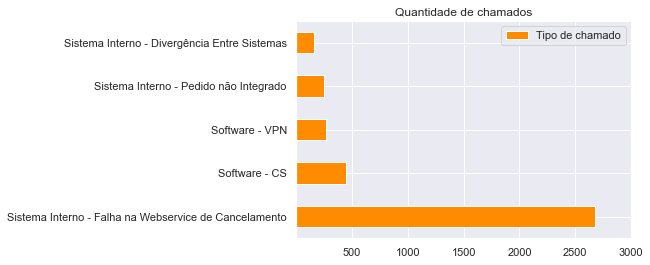

In [7]:
# Gerando o gráfico com a top 5 de chamados abertos Total
sns.set()
plt.figure(figsize=(15,8))
grafico_chamados = qtd_chamados.head(5).plot.barh(y='Tipo de chamado',  color = '#FF8C00')
grafico_chamados.set_title('Quantidade de chamados')
plt.xlim((1,3000))



Mostrando o mesmo gráfico em porcentagem.

(1.0, 100.0)

<Figure size 1080x576 with 0 Axes>

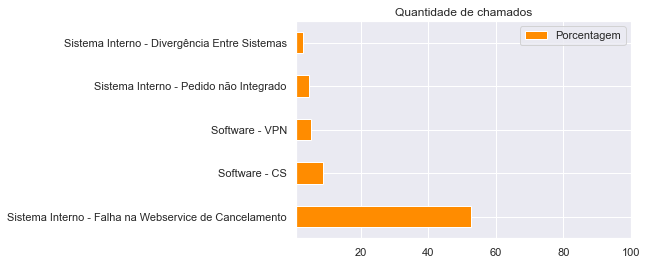

In [8]:
#Gerando o gráfico em porcentagem da quatidade Total
sns.set()
plt.figure(figsize=(15,8))
grafico_chamados = qtd_chamados.head(5).plot.barh(y='Porcentagem', color = '#FF8C00')
grafico_chamados.set_title('Quantidade de chamados')
plt.xlim((1,100))

Levantando a quantidade de chamados abertos em 2022(até a data da analise)

In [9]:
chamados['Mês Criação'].sort_values(ascending=True)
chamados['Mês Criação'] = chamados['Mês Criação'].sort_values(ascending=True)

In [10]:
chamados['Mês Criação'] = pd.to_datetime(chamados['Mês Criação'], format='%m/%Y')
chamados.loc[(chamados['Mês Criação'].dt.year == 2022)]
chamados_2022 = chamados.loc[(chamados['Mês Criação'].dt.year == 2022)]
chamados_2022['Mês Criação'].value_counts()


2022-05-01    186
2022-03-01    174
2022-04-01    173
2022-01-01    136
2022-02-01    131
2022-06-01     32
Name: Mês Criação, dtype: int64

Gráfico de Quantidade de chamados x mês

<AxesSubplot:ylabel='Mês Criação'>

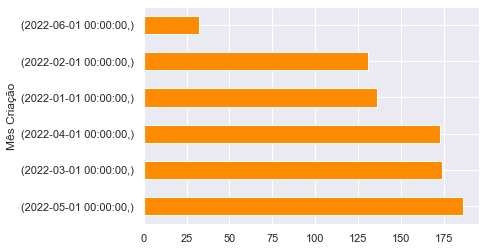

In [11]:
chamados_2022['Mês Criação'].sort_values(ascending=False)
qtd_chamados_mes = pd.DataFrame(chamados_2022['Mês Criação'].sort_values(ascending=False))
qtd_chamados_mes.value_counts().plot.barh(y='Mês Criação', color = '#FF8C00')



Gráfico de barras onde mostra as pessoas que mais abriram chamados em 2022

<AxesSubplot:>

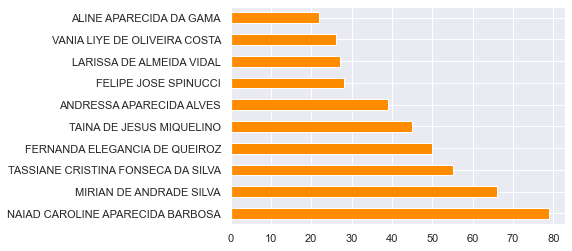

In [12]:
chamados_2022['Relator'].value_counts().head(10).plot.barh(color = '#FF8C00')

Criando um gráfico que mostra a porcentagem de chamados abertos por pessoa. 

<AxesSubplot:>

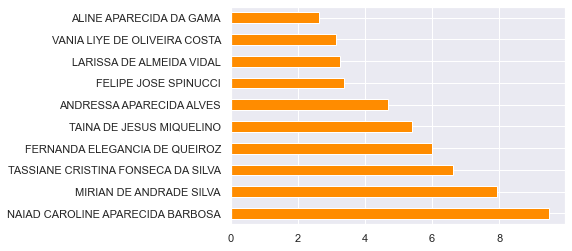

In [13]:
chamados_2022['Relator'].value_counts().head(5)
qtd_abertos = pd.DataFrame(chamados_2022['Relator'].value_counts())
chamados_abertos = qtd_abertos['Relator'] / qtd_abertos['Relator'].sum()
chamados_abertos = pd.DataFrame(chamados_abertos)
chamados_abertos['Relator'] = chamados_abertos['Relator']*100
chamados_abertos['Relator'].head(10).plot.barh(color = '#FF8C00')



Tabela com as % de chamados abertos por pessoa em 2022

In [14]:
chamados = qtd_abertos['Relator'] / qtd_abertos['Relator'].sum()
chamados_abertos = pd.DataFrame(chamados_abertos)
chamados_abertos['Relator']


NAIAD CAROLINE APARECIDA BARBOSA     9.50
MIRIAN DE ANDRADE SILVA              7.93
TASSIANE CRISTINA FONSECA DA SILVA   6.61
FERNANDA ELEGANCIA DE QUEIROZ        6.01
TAINA DE JESUS MIQUELINO             5.41
                                     ... 
BEATRIZ LEME DA SILVA                0.12
TAMIRES GARCIA                       0.12
LETICIA DA COSTA SILVA               0.12
NICOLY MILANESE SOARES               0.12
Francisco Walace Pereira de Sousa    0.12
Name: Relator, Length: 86, dtype: float64

Gráfico de Tipo de Chamados abertos em 2022

(1.0, 100.0)

<Figure size 1080x576 with 0 Axes>

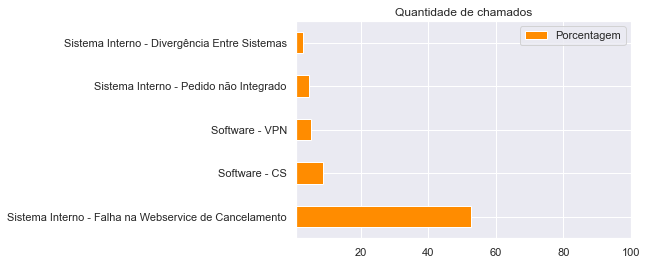

In [15]:
sns.set()
plt.figure(figsize=(15,8))
grafico_chamados = qtd_chamados.head(5).plot.barh(y='Porcentagem', color = '#FF8C00')
grafico_chamados.set_title('Quantidade de chamados')
plt.xlim((1,100))

Fazendo a tratativa de casos que foram abertos em outra "fila"

In [16]:
webservice = chamados_2022['Resumo'].str.lower().str.count("webservice")

dfws = pd.DataFrame(webservice)

chamados_2022['Webservice'] = dfws['Resumo']
chamados_2022['Webservice']


0      0
1      0
2      0
3      0
4      0
      ..
827    0
828    0
829    0
830    0
831    0
Name: Webservice, Length: 832, dtype: int64

In [17]:
chamados_2022.sample(5)

,Chave,Resumo,Responsável,Relator,Status,Criado,Resolvido,Tipo de chamado,Mês Criação,Macro Chamado,Webservice
821,CDC-7312,minha vpn não esta entrando,THIAGO JUNIO DE ALMEIDA,LEONARDO ROBERTO LEMOS,Encerrado,2022-01-05 13:07:26,1/5/2022 19:05:51,Software - VPN,2022-01-01,Sistema,0
526,CDC-7877,Cancelamento de WebService INO,THIAGO JUNIO DE ALMEIDA,TASSIANE CRISTINA FONSECA DA SILVA,Encerrado,2022-03-08 19:57:52,3/8/2022 21:01:11,Sistema Interno - Falha na Webservice de Cance...,2022-03-01,Sistema,1
216,CDC-8467,"CS não carrrega Task, quando crio o cadastro d...",THIAGO JUNIO DE ALMEIDA,HEBERT DE CARVALHO,Encerrado,2022-05-02 14:39:36,5/2/2022 15:11:49,Software - CS,2022-05-01,Sistema,0
556,CDC-7815,Liberação de web services,THIAGO JUNIO DE ALMEIDA,ANDRESSA APARECIDA ALVES,Encerrado,2022-03-02 20:05:27,3/2/2022 21:34:23,Sistema Interno - Falha na Webservice de Cance...,2022-03-01,Sistema,0
557,CDC-7813,PM Mobly - Verificar erro no site,THIAGO JUNIO DE ALMEIDA,PRISCILA LIMA DE PAULA,Encerrado,2022-03-02 19:18:45,3/8/2022 16:24:36,Site - Erro Genérico,2022-03-01,Sistema,0


localizado que 10 casos de Webservice foram abertos como "Software - CS" e não como Falha na Webservice

In [18]:
chamados_webservice = pd.pivot_table(chamados_2022, index=['Tipo de chamado'], values = 'Webservice', aggfunc='sum', margins = True)
chamados_webservice.sort_values(by='Webservice', ascending = False)


,Webservice
Tipo de chamado,
All,436
Sistema Interno - Falha na Webservice de Cancelamento,308
Sistema interno - Falha de Webservice Aprovar Coleta,99
Sistema interno - Falha de Webservice Gerar Cupom,11
Software - CS,10
Sistema interno - Falha de Webservice SPLIT,6
Sistema interno - Falha de Webservice Coleta Seller,2
Sistema Interno - Erro ao Salvar Informações,0
Site - Divergência de preço,0


Atribuindo o valor 1 para os casos abertos fora da fila.

In [19]:
chamados_2022['Count_chamados'] = chamados_2022['Webservice']== 0
chamados_2022['Count_chamados'].replace('True', 1).astype(int)



0      1
1      1
2      1
3      1
4      1
      ..
827    1
828    1
829    1
830    1
831    1
Name: Count_chamados, Length: 832, dtype: int32

In [20]:
chamados_webservice = pd.pivot_table(chamados_2022, index=['Tipo de chamado'], values = ['Webservice','Count_chamados'], aggfunc='sum', margins=True)
chamados_webservice.sort_values(by='Webservice', ascending = False)

,Count_chamados,Webservice
Tipo de chamado,,
All,395,436
Sistema Interno - Falha na Webservice de Cancelamento,96,308
Sistema interno - Falha de Webservice Aprovar Coleta,23,99
Sistema interno - Falha de Webservice Gerar Cupom,3,11
Software - CS,13,10
Sistema interno - Falha de Webservice SPLIT,1,6
Sistema interno - Falha de Webservice Coleta Seller,2,2
Sistema Interno - Erro ao Salvar Informações,22,0
Site - Divergência de preço,2,0


Somando os valores que foram atribuidos "1" no comando anterior e trazendo o valor correto em cada fila.
Criando também uma coluna com as % de cada caso.

In [21]:
chamados_2022['qtd'] = chamados_2022['Count_chamados']+ chamados_2022['Webservice']


Criando a coluna de % depois de levantar os dados corretos de cada Fila de chamados.

In [22]:
chamados_webservice2 = pd.pivot_table(chamados_2022, index=['Tipo de chamado'],values = 'qtd', aggfunc='sum', margins=False)
chamados_webservice2['%'] = (chamados_webservice2['qtd']/chamados_webservice2['qtd'].sum())*100
chamados_webservice2.sort_values(by='qtd', ascending = False)




,qtd,%
Tipo de chamado,,
Sistema Interno - Falha na Webservice de Cancelamento,404,48.62
Sistema interno - Falha de Webservice Aprovar Coleta,122,14.68
Software - VPN,35,4.21
Sistema Interno - Pedido não Integrado,33,3.97
Sistema Interno - Indisponibilidade,25,3.01
Software - CS,23,2.77
Sistema Interno - Erro ao Salvar Informações,22,2.65
Sistema Interno - Não Carrega Pedidos,22,2.65
Sistema Interno - Divergência Entre Sistemas,14,1.68


Traçando um gráfico para mostrar a quantidade de chamados abertos em 2022.

<AxesSubplot:ylabel='Tipo de chamado'>

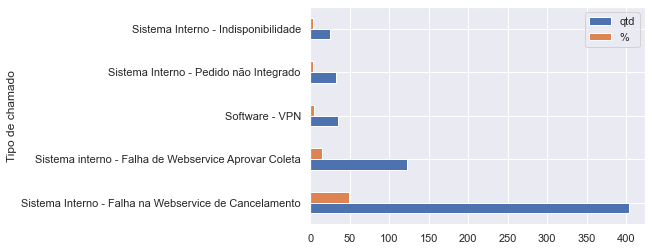

In [23]:
sns.set()
chamados_webservice2.sort_values(by='qtd', ascending = False).head(5).plot.barh()

Depois disso foi levantando em reunião uma estratégia para melhorar cada "Tipo de chamado" mostrado na analise.
Para falaha de webservice e webservice de aprovar coleta, criamos RPA, para VPN foi feito uma solução junto ao time de Infraestrutura.
Para pedido não integrado, entramos em contato com o time de suporte TI que atuava nesses casos.
Para Sistema Interno foram feitas melhorias por parte do time de infraestrutura que também reduziram a quantidade de chamados.